# Task 6 

In [1]:
import numpy as np
import cv2
from skimage import measure, segmentation
import matplotlib.pyplot as plt
from PIL import Image
import morphology 



In [2]:
root_mask = cv2.imread("root_mask.tif", cv2.IMREAD_GRAYSCALE)
# This is the root mask image. It is a binary image with the root in white and the background in black.

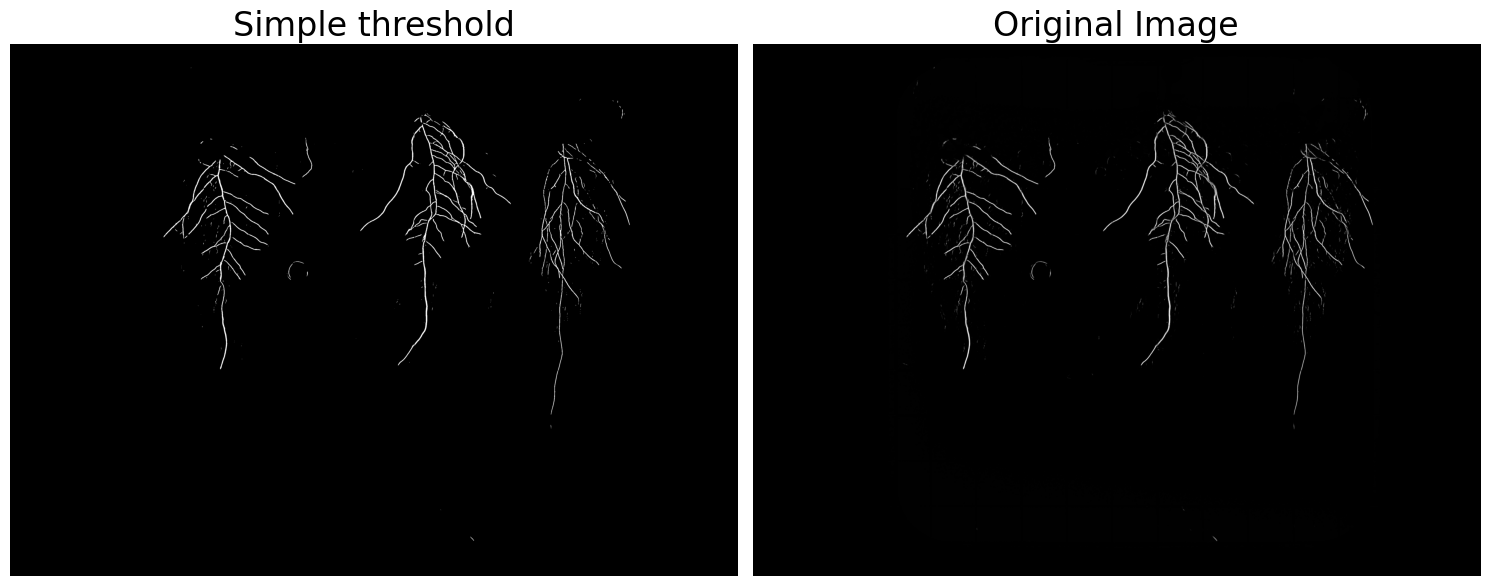

In [13]:
# Apply Simple Thresholding
_, simple_thresh = cv2.threshold(root_mask,105, 255, cv2.THRESH_BINARY)  # Threshold value = 127

# Plot the result
plt.figure(figsize=(15, 7))  # Larger size for better visualization
plt.subplot(1, 2, 1)
plt.title("Simple threshold", fontsize=24)
plt.imshow(simple_thresh , cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Original Image", fontsize=24)
plt.imshow(root_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

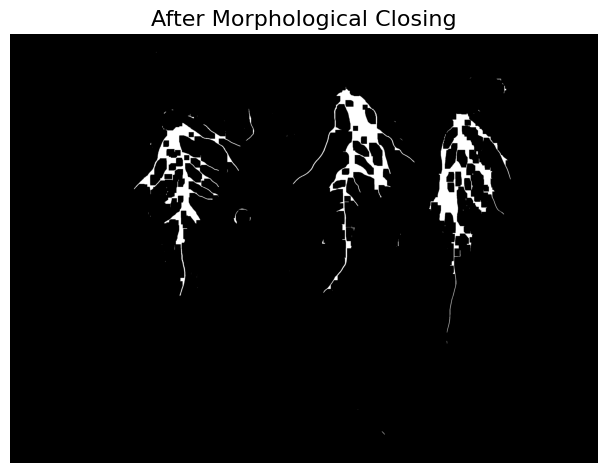

In [17]:
# Define a kernel for morphological operations


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 35))  # Adjust kernel size as needed

# Apply Closing to fill gaps
closed_mask = cv2.morphologyEx(simple_thresh , cv2.MORPH_CLOSE, kernel)

# Plot the result


plt.title("After Morphological Closing", fontsize=16)
plt.imshow(closed_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


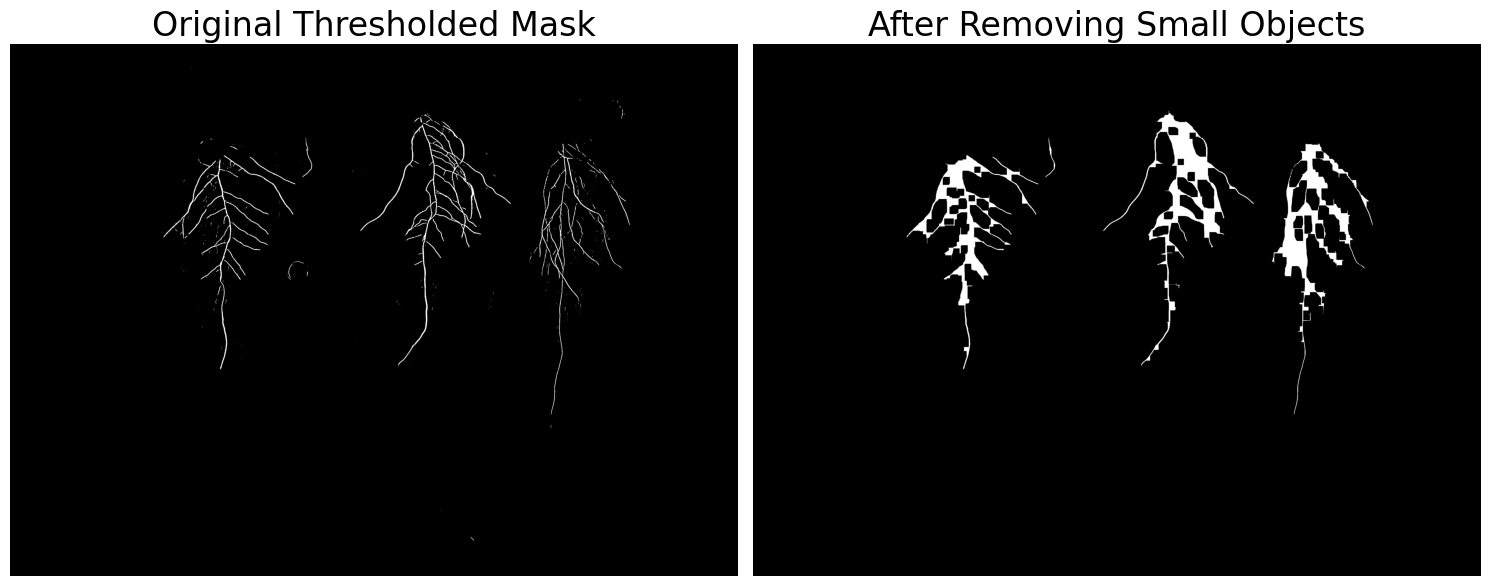

In [22]:
from skimage.morphology import remove_small_objects
import numpy as np

# Ensure the mask is binary (required for skimage's remove_small_objects)
binary_mask = closed_mask > 0  # Convert to boolean (True for object pixels)

# Remove small objects (size threshold can be adjusted as needed)
cleaned_mask = remove_small_objects(binary_mask, min_size=700)  # Adjust min_size to suit your needs

# Convert back to uint8 for visualization
cleaned_mask = (cleaned_mask * 255).astype(np.uint8)

# Plot the result
plt.figure(figsize=(15, 7))  # Larger size for better visualization
plt.subplot(1, 2, 1)
plt.title("Original Thresholded Mask", fontsize=24)
plt.imshow(simple_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Removing Small Objects", fontsize=24)
plt.imshow(cleaned_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


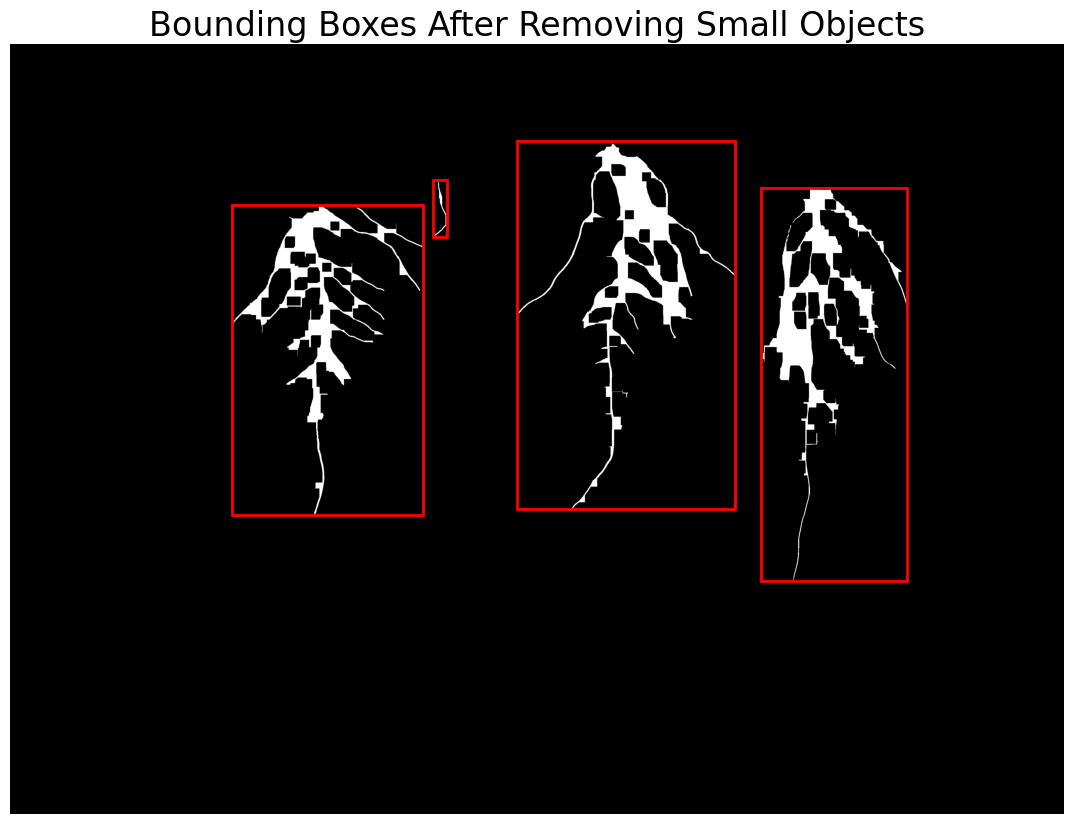

In [23]:
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

# Step 1: Label the cleaned mask
labeled_mask = label(cleaned_mask > 0)  # Label connected regions in the binary mask

# Step 2: Initialize the plot for bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(cleaned_mask, cmap='gray')
ax.set_title("Bounding Boxes After Removing Small Objects", fontsize=24)

# Step 3: Compute bounding boxes and overlay them
for region in regionprops(labeled_mask):
    # Get the bounding box coordinates
    minr, minc, maxr, maxc = region.bbox
    # Draw a rectangle around each region
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                               fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

# Step 4: Display the result
plt.axis('off')
plt.show()


In [28]:
from skimage.measure import label

# Label connected components in the binary mask
labeled_mask = label(cleaned_mask > 0)  # Ensure mask is binary (True for foreground pixels)

# Count the number of connected components (excluding the background)
num_connected_components = labeled_mask.max()

# Print the count of connected components
print(f"Number of connected components: {num_connected_components}")


Number of connected components: 4


Number of connected components: 4


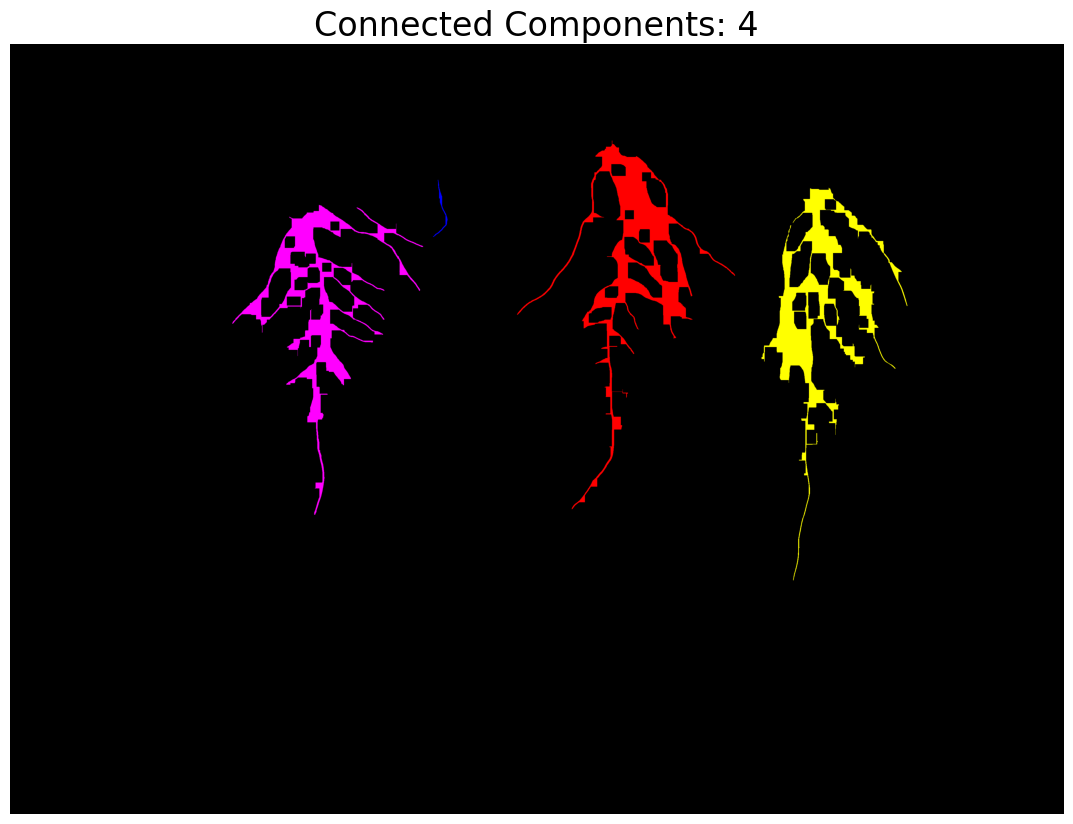

In [29]:
from skimage.measure import label
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Label connected components in the binary mask
labeled_mask = label(cleaned_mask > 0)  # Ensure mask is binary (True for foreground pixels)

# Count the number of connected components (excluding the background)
num_connected_components = labeled_mask.max()
print(f"Number of connected components: {num_connected_components}")

# Convert labeled mask to a color image for visualization
colored_labels = label2rgb(labeled_mask, bg_label=0, bg_color=(0, 0, 0), colors=None)

# Plot the labeled connected components
plt.figure(figsize=(15, 10))
plt.title(f"Connected Components: {num_connected_components}", fontsize=24)
plt.imshow(colored_labels)
plt.axis('off')
plt.show()


--- 

# Task 7 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2

from skimage.morphology import skeletonize
from skimage.morphology import remove_small_objects

In [33]:
skeleton_object = skeletonize(cleaned_mask)  # Compute the skeleton of the cleaned mask)

(-0.5, 4111.5, 3005.5, -0.5)

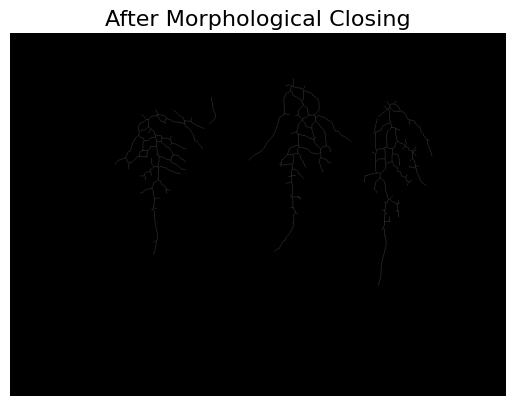

In [34]:
plt.title("After Morphological Closing", fontsize=16)
plt.imshow(skeleton_object, cmap='gray')
plt.axis('off')